In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv


In [48]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from keras.datasets import mnist
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from sklearn.model_selection import KFold
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,BatchNormalization
from keras.optimizers import RMSprop,Adam,SGD

In [30]:
file = open("../input/mnist-in-csv/mnist_train.csv")
data_train = pd.read_csv(file)
y_train = np.array(data_train.iloc[:, 0])
x_train = np.array(data_train.iloc[:, 1:])
file = open("../input/mnist-in-csv/mnist_test.csv")
data_test = pd.read_csv(file)
x_test = np.array(data_test.iloc[:, 1:])
y_test = np.array(data_test.iloc[:, 0])

In [35]:
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))

In [38]:
# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [39]:
x_train= x_train.astype('float32')
x_test = x_test.astype('float32')
x_train =x_train/255.0
x_test = x_test/255.0

In [50]:
# define cnn model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [55]:
scores, histories = [], []
# prepare cross validation
kfold = KFold(5, shuffle=True, random_state=1)
# enumerate splits
for train_ix, test_ix in kfold.split(x_train):
    # define model
    # fit model...this takes in four arguments: training data, target data, validation data, number of epochs
    history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)
    # evaluate model
    _, acc = model.evaluate(x_test, y_test, verbose=1)
    print('> %.3f' % (acc * 100.0))
    # stores scores
    scores.append(acc)
    histories.append(history)

Epoch 1/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0766 - accuracy: 0.9782 - val_loss: 0.0635 - val_accuracy: 0.9803
Epoch 2/10
469/469 [==============================] - 13s 29ms/step - loss: 0.0559 - accuracy: 0.9843 - val_loss: 0.0597 - val_accuracy: 0.9817
Epoch 3/10
469/469 [==============================] - 13s 29ms/step - loss: 0.0444 - accuracy: 0.9876 - val_loss: 0.0507 - val_accuracy: 0.9833
Epoch 4/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0375 - accuracy: 0.9897 - val_loss: 0.0470 - val_accuracy: 0.9853
Epoch 5/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0313 - accuracy: 0.9910 - val_loss: 0.0478 - val_accuracy: 0.9839
Epoch 6/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0268 - accuracy: 0.9926 - val_loss: 0.0404 - val_accuracy: 0.9871
Epoch 7/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0229 - accuracy: 0.9939 - val_loss: 0.0428 - val_accuracy:

In [56]:
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))

Accuracy: mean=98.716 std=0.052, n=5


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


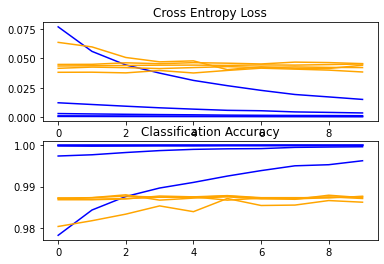

In [57]:
for i in range(len(histories)):
        # plot loss
        pyplot.subplot(2, 1, 1)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        pyplot.subplot(2, 1, 2)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
pyplot.show()

In [58]:
def define_model_batchnorm():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [59]:
model2 = define_model_batchnorm()

In [60]:
scores2, histories2 = [], []
# prepare cross validation
kfold = KFold(5, shuffle=True, random_state=1)
# enumerate splits
for train_ix, test_ix in kfold.split(x_train):
    # define model
    # fit model
    history = model2.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)
    # evaluate model
    _, acc = model2.evaluate(x_test, y_test, verbose=1)
    print('> %.3f' % (acc * 100.0))
    # stores scores
    scores2.append(acc)
    histories2.append(history)

Epoch 1/10
469/469 [==============================] - 23s 47ms/step - loss: 0.3180 - accuracy: 0.9071 - val_loss: 0.1213 - val_accuracy: 0.9686
Epoch 2/10
469/469 [==============================] - 22s 46ms/step - loss: 0.0609 - accuracy: 0.9831 - val_loss: 0.0580 - val_accuracy: 0.9837
Epoch 3/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0375 - accuracy: 0.9900 - val_loss: 0.0487 - val_accuracy: 0.9853
Epoch 4/10
469/469 [==============================] - 22s 46ms/step - loss: 0.0261 - accuracy: 0.9938 - val_loss: 0.0474 - val_accuracy: 0.9859
Epoch 5/10
469/469 [==============================] - 21s 46ms/step - loss: 0.0151 - accuracy: 0.9973 - val_loss: 0.0471 - val_accuracy: 0.9857
Epoch 6/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0121 - accuracy: 0.9981 - val_loss: 0.0440 - val_accuracy: 0.9859
Epoch 7/10
469/469 [==============================] - 22s 46ms/step - loss: 0.0081 - accuracy: 0.9993 - val_loss: 0.0423 - val_accuracy:

In [61]:
print('Accuracy: mean = %.3f std=%.3f, n=%d' % (np.mean(scores2)*100, np.std(scores2)*100, len(scores2)))

Accuracy: mean = 98.626 std=0.036, n=5


In [62]:
# define cnn model
def define_model_d():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPool2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [63]:
model3 =define_model_d()

In [ ]:
scores3, histories3 = [], []
# prepare cross validation
kfold = KFold(5, shuffle=True, random_state=1)
# enumerate splits
for train_ix, test_ix in kfold.split(x_train):
    # define model
    # fit model
    history = model3.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)
    # evaluate model
    _, acc = model3.evaluate(x_test, y_test, verbose=1)
    print('> %.3f' % (acc * 100.0))
    # stores scores
    scores3.append(acc)
    histories3.append(history)

Epoch 1/10
196/469 [===========>..................] - ETA: 20s - loss: 0.7278 - accuracy: 0.7685

In [ ]:
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores3)*100, np.std(scores3)*100, len(scores3)))